# PROJET DE THEORIE DES COPULES

## Question 1
À partir des spreads de CDS des deux entreprises pour différentes
maturités, extraire les probabilités de défaut implicites.

In [1]:
##  La variable de defaut suit une loi exponentielle de paramètre lamda 

def lambda_T (spread_T, R_T):
    return spread_T/(1 + R_T)

lamba_BNP_4 = lambda_T(0.01, 0.6)
lamda_SG_4 = lambda_T(0.012,0.3)


In [3]:
import math
def proba_defaut(lambda_ , T):
    return 1 - math.exp(-lambda_ * T)

In [7]:
PD_SG_4 = proba_defaut(lamda_SG_4,4)
PD_BNP_4 = proba_defaut(lamba_BNP_4,4)
print("proba defaut SG à horizon 4 ans :", PD_SG_4, "\n Proba defaut BNP à horizon 4 ans", PD_BNP_4)

proba defaut SG à horizon 4 ans : 0.0362497328662722 
 Proba defaut BNP à horizon 4 ans 0.024690087971667385


## Question 2
Caractériser les distributions des taux de recouvrement de chacune des deux créances. 
On suppose que ces taux de recouvrement sont indépendants et qu'ils sont distribués suivant une loi beta. Leurs lois marginales les caractérisent donc complètement
 Les paramètres de cette loi sont obtenus via la méthode des moements et on a que 

In [8]:
def param_loi_beta(mu, sigma):
    a_hat = (((mu**2)*(1-mu))/(sigma**2)) - mu

    b_hat = (((mu**2)*((1-mu)**2))/(mu*(sigma)**2)) - (1-mu)

    return a_hat, b_hat

In [9]:
a_hat_SG, b_hat_SG = param_loi_beta(0.3, 0.25)
a_hat_SG, b_hat_SG

(0.708, 1.652)

In [10]:
a_hat_BNP, b_hat_BNP = param_loi_beta(0.6, 0.15)
a_hat_BNP, b_hat_BNP

(5.8, 3.8666666666666676)

In [11]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def beta_density(a, b, x):
    """
    Calcule la densité de probabilité de la loi Beta pour des paramètres a et b.
    :param x: Valeur où évaluer la densité
    """
    if a <= 0 or b <= 0:
        raise ValueError("Les paramètres a et b doivent être strictement positifs.")
    return stats.beta.pdf(x, a, b)

def plot_beta_density(a, b):
    """
    Affiche la courbe de densité de la loi Beta pour les paramètres donnés a et b
    """
    x = np.linspace(0, 1, 100)
    y = beta_density(a, b, x)
    
    plt.plot(x, y, label=f'Beta({a}, {b})')
    plt.xlabel('x')
    plt.ylabel('Densité')
    plt.title('Densité de probabilité de la loi Beta')
    plt.legend()
    plt.grid()
    plt.show()



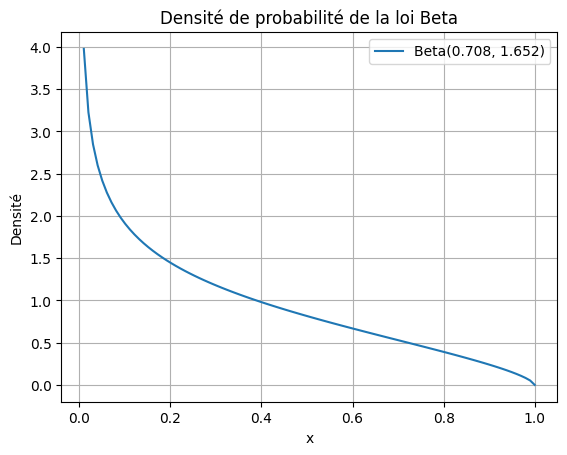

In [15]:

plot_beta_density(a_hat_SG, b_hat_SG)

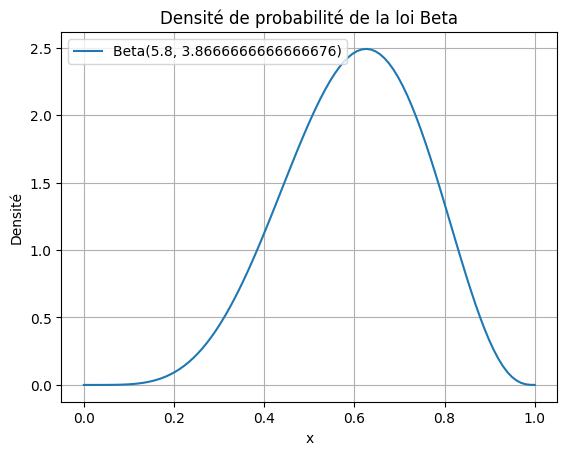

In [13]:
plot_beta_density(a_hat_BNP, b_hat_BNP)

# Q.3. On s’intéresse à l’historique des données actions. 
a. Effectuons une analyse exploratoire univariée des données actions de ces deux entreprises.